In [1]:
# 开启代码提示
%config Completer.use_jedi = False
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 不折叠数据框
import pandas as pd
pd.set_option('display.max_columns', None) # 显示完整的列
pd.set_option('display.max_rows', None) # 显示完整的行
pd.set_option('display.expand_frame_repr', False) # 设置不折叠数据
pd.set_option('display.max_colwidth', 100)

# 探索训练集

In [3]:
# 导入训练集
train_data = pd.read_csv("../input/spaceship-titanic/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


PassengerId -- 每位乘客的唯一 ID。每个 Id 采用gggg_pp形式，其中 gggg 表示乘客随行的团体，pp 表示他们在团体中的号码。群体中的人通常是家庭成员，但并非总是如此。（该特征丢弃）
<br>

HomePlanet -- 乘客离开的行星，通常是他们的永久居住行星。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

GryoSleep -- 指示乘客是否在航行期间被选择进入暂停动画状态。处于冷冻睡眠状态的乘客被限制在他们的机舱内。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Cabin -- 乘客居住的机舱号。采用甲板/数字/侧面的形式，其中侧面可以是 P 表示左舷，也可以是 S 表示右舷。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Destination -- 乘客将要下船的星球。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Age -- 乘客的年龄。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

VIP -- 旅客在航行期间是否支付了特殊VIP服务费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

RoomService -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

FoodCourt  -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

ShoppingMall -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Spa -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

VRDeck -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Name -- 乘客的名字和姓氏。（该特征丢弃）
<br>

Transported  -- 乘客是否被运送到另一个维度。这是目标，您尝试预测的列。

In [4]:
# 删除无用特征
train_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [5]:
# 统计缺失值数量
train_data.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

# 探索测试集

In [6]:
# 导入测试集
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


相对于训练集，测试集没有 Transported 列

In [7]:
# 删除无用特征
test_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [8]:
# 统计缺失值
test_data.isna().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64

# 合并训练集和测试集

In [9]:
# 合并训练集和测试集
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.shape

(12970, 12)

In [10]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [11]:
all_data.isna().sum().sort_values(ascending=False)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64

# 对合并后的数据集进行预处理

## HomePlanet特征

In [12]:
all_data.HomePlanet.value_counts(dropna=False)

Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: HomePlanet, dtype: int64

In [13]:
# 使用众数填充 HomePlanet 列的缺失值
all_data['HomePlanet'] = all_data['HomePlanet'].fillna('Earth')
all_data.HomePlanet.value_counts(dropna=False)

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

## CryoSleep特征

In [14]:
all_data.CryoSleep.value_counts(dropna=False)

False    8079
True     4581
NaN       310
Name: CryoSleep, dtype: int64

In [15]:
# 使用众数填充 CryoSleep 列的缺失值
all_data['CryoSleep'] = all_data['CryoSleep'].fillna(False)
all_data.CryoSleep.value_counts(dropna=False)

False    8389
True     4581
Name: CryoSleep, dtype: int64

## Cabin特征

In [16]:
# 将 Cabin 特征拆分为 deck/num/side 三个特征
all_data = pd.concat([all_data, all_data['Cabin'].str.split('/', expand=True)], axis=1)
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [17]:
all_data.shape

(12970, 15)

In [18]:
all_data.drop('Cabin', axis=1, inplace=True)

In [19]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [20]:
all_data.rename(columns={0: 'Deck', 1: 'Num', 2: 'Side'}, inplace=True)

In [21]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [22]:
all_data.Deck.value_counts(dropna=False)

F      4239
G      3781
E      1323
B      1141
C      1102
D       720
A       354
NaN     299
T        11
Name: Deck, dtype: int64

In [23]:
# 使用众数填充 Deck 特征
all_data['Deck'] = all_data['Deck'].fillna('F')
all_data.Deck.value_counts(dropna=False)

F    4538
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64

In [24]:
# 统计数量后发现 Num 特征没有用处，删除 Num 特征
all_data.drop('Num', axis=1, inplace=True)

In [25]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [26]:
all_data.Side.value_counts(dropna=False)

S      6381
P      6290
NaN     299
Name: Side, dtype: int64

In [27]:
# 使用随机数填充 Side 特征
all_data['Side'] = all_data['Side'].fillna(method='ffill')
all_data.Side.value_counts(dropna=False)

S    6524
P    6446
Name: Side, dtype: int64

## Destination 特征

In [28]:
all_data.Destination.value_counts(dropna=False)

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NaN               274
Name: Destination, dtype: int64

In [29]:
# 使用众数填充缺失值
all_data['Destination'] = all_data['Destination'].fillna('TRAPPIST-1e')
all_data.Destination.value_counts(dropna=False)

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

## Age 特征

<AxesSubplot:ylabel='Density'>

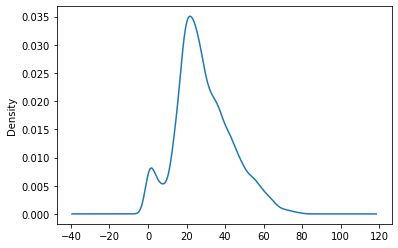

In [30]:
all_data['Age'].plot.density()

<AxesSubplot:ylabel='Density'>

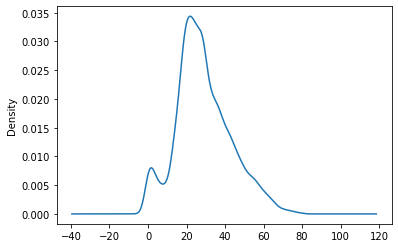

In [31]:
# 使用均值填充缺失值
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mean())
all_data['Age'].plot.density()

In [32]:
all_data.Age.isnull().sum()

0

## VIP 特征

In [33]:
all_data.VIP.value_counts(dropna=False)

False    12401
NaN        296
True       273
Name: VIP, dtype: int64

In [34]:
# 使用众数填充缺失值
all_data['VIP'] = all_data['VIP'].fillna(False)
all_data.VIP.value_counts(dropna=False)

False    12697
True       273
Name: VIP, dtype: int64

## RoomService 特征

<AxesSubplot:ylabel='Density'>

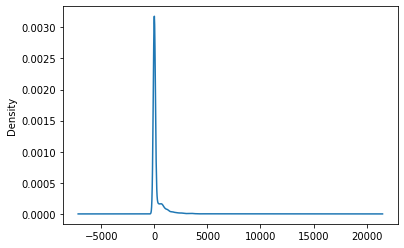

In [35]:
all_data['RoomService'].plot.density()

<AxesSubplot:ylabel='Density'>

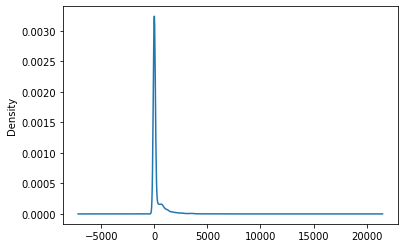

In [36]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['RoomService'] = all_data['RoomService'].fillna(all_data['RoomService'].median())
all_data['RoomService'].plot.density()

In [37]:
all_data.RoomService.isnull().sum()

0

## FoodCourt 特征

<AxesSubplot:ylabel='Density'>

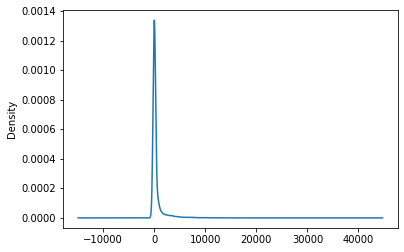

In [38]:
all_data['FoodCourt'].plot.density()

<AxesSubplot:ylabel='Density'>

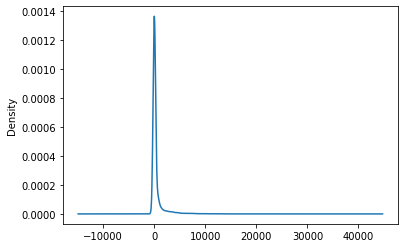

In [39]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['FoodCourt'] = all_data['FoodCourt'].fillna(all_data['FoodCourt'].median())
all_data['FoodCourt'].plot.density()

In [40]:
all_data.FoodCourt.isnull().sum()

0

## ShoppingMall 特征

<AxesSubplot:ylabel='Density'>

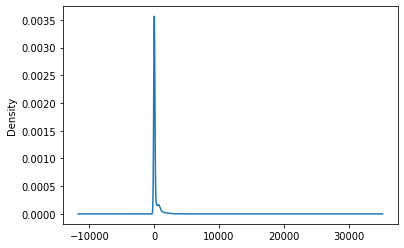

In [41]:
all_data['ShoppingMall'].plot.density()

In [42]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['ShoppingMall'] = all_data['ShoppingMall'].fillna(all_data['ShoppingMall'].median())
all_data.ShoppingMall.isnull().sum()

0

## Spa 特征

<AxesSubplot:ylabel='Density'>

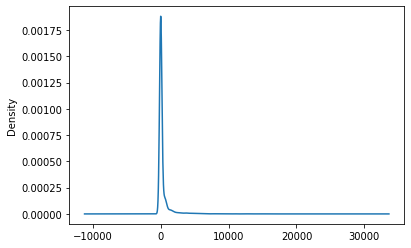

In [43]:
all_data['Spa'].plot.density()

In [44]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['Spa'] = all_data['Spa'].fillna(all_data['Spa'].median())
all_data.Spa.isnull().sum()

0

## VRDeck 特征

<AxesSubplot:ylabel='Density'>

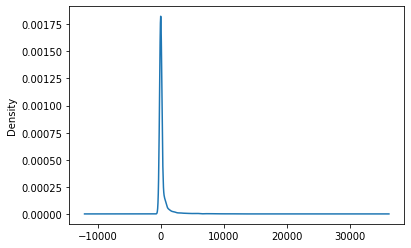

In [45]:
all_data['VRDeck'].plot.density()

In [46]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['VRDeck'] = all_data['VRDeck'].fillna(all_data['VRDeck'].median())
all_data.VRDeck.isnull().sum()

0

# 判断缺失值是否填充完成

In [47]:
all_data.isna().sum().sort_values(ascending=False)

Transported     4277
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Deck               0
Side               0
dtype: int64

# 将特征都转换为数值型数据

In [48]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


分类型特征（需要转换为数值）：HomePlanet、CryoSleep、Destination、VIP、Deck、Side
<br>

数值型特征（无需转换）：Age、RoomService、FoodCourt、ShoppingMall、Spa、VRDeck
<br>

目标特征（bool类型）：Transported

In [49]:
categorical_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
# 将非数字的标签分类字段编码为数字
for col in categorical_col:
    all_data[col] = all_data[col].astype("category").cat.codes

all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1


# 独热编码

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

# 独热编码分类列
# 不过这里得到的是一个数组，因此后续要将它转换为 dataframe
array_hot_encoded = ohe.fit_transform(all_data[categorical_col]).toarray()

# 将数组转换为dataframe
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=all_data.index)

# 得到其他不需要编码的字段
data_other_cols = all_data.drop(columns=categorical_col)

# 连接两个dataframe
all_data = pd.concat([data_hot_encoded, data_other_cols], axis=1)

all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0,True


In [51]:
# 将所有特征的列名称转换为 str
print('in',all_data.columns.map(type))
all_data.columns = all_data.columns.astype(str)
print('out',all_data.columns.map(type))

in Index([<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')
out Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')


# 拆分训练集和测试集

In [52]:
train_data.shape, test_data.shape, all_data.shape

((8693, 12), (4277, 11), (12970, 27))

In [53]:
train_data = all_data.iloc[:8693, :]
test_data = all_data.iloc[-4277:, :]
train_data.shape, test_data.shape

((8693, 27), (4277, 27))

In [54]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0,True


In [55]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8693,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,NaN
8694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,0.0,9.0,0.0,2823.0,0.0,NaN
8695,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,NaN
8696,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,0.0,6652.0,0.0,181.0,585.0,NaN
8697,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,635.0,0.0,0.0,NaN


In [56]:
test_data.drop(['Transported'], axis=1, inplace=True)

In [57]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
8693,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0
8694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,0.0,9.0,0.0,2823.0,0.0
8695,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0
8696,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,0.0,6652.0,0.0,181.0,585.0
8697,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,635.0,0.0,0.0


In [58]:
train_data['Transported'] = train_data['Transported'].astype("category").cat.codes
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0,1


# 特征选择

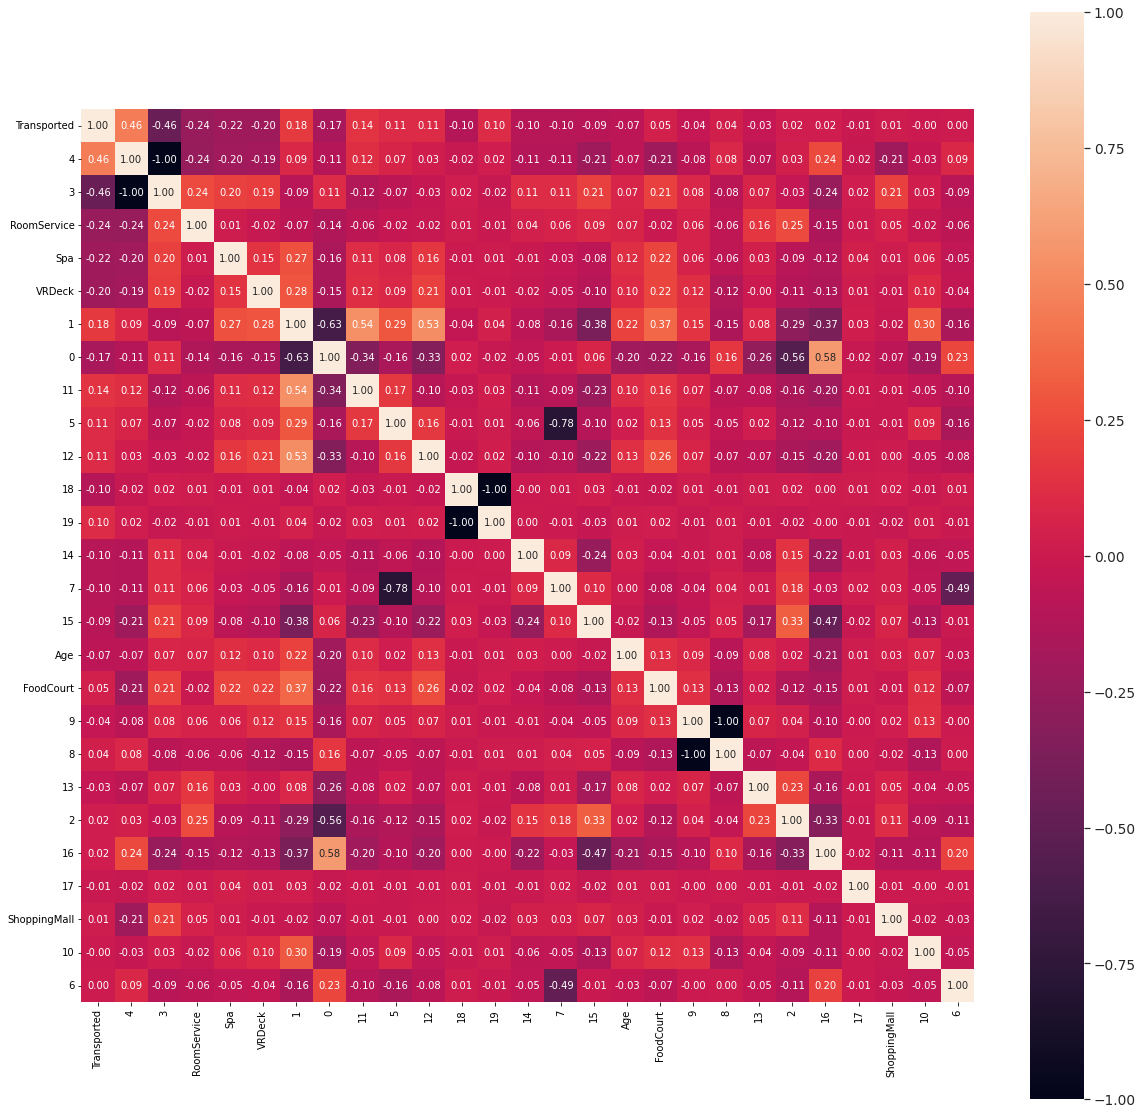

Index(['Transported', '4', '3', 'RoomService', 'Spa', 'VRDeck', '1', '0', '11',
       '5', '12', '18', '19', '14', '7', '15', 'Age', 'FoodCourt', '9', '8',
       '13', '2', '16', '17', 'ShoppingMall', '10', '6'],
      dtype='object')

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
k = 40 # 变量数
f,ax = plt.subplots(figsize=(20, 20))
cols = train_data.corr().abs().nlargest(k, 'Transported')['Transported'].index  
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
cols

In [60]:
train_data = train_data[cols]
test_data = test_data[cols.drop('Transported')]
train_data.shape , test_data.shape

((8693, 27), (4277, 26))

In [61]:
train_data.head()

,Transported,4,3,RoomService,Spa,VRDeck,1,0,11,5,12,18,19,14,7,15,Age,FoodCourt,9,8,13,2,16,17,ShoppingMall,10,6
0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,109.0,549.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,24.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0
2,0,0.0,1.0,43.0,6715.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,58.0,3576.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,1.0,0.0,3329.0,193.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33.0,1283.0,0.0,1.0,0.0,0.0,0.0,0.0,371.0,1.0,0.0
4,1,0.0,1.0,303.0,565.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,16.0,70.0,0.0,1.0,0.0,0.0,0.0,0.0,151.0,0.0,0.0


In [62]:
test_data.head()

,4,3,RoomService,Spa,VRDeck,1,0,11,5,12,18,19,14,7,15,Age,FoodCourt,9,8,13,2,16,17,ShoppingMall,10,6
8693,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8694,0.0,1.0,0.0,2823.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,19.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8695,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8696,0.0,1.0,0.0,181.0,585.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,38.0,6652.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8697,0.0,1.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,635.0,0.0,0.0


# 清除异常值

In [63]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(contamination = 0.02)
# 识别异常值:
outliers = clf.fit_predict(train_data)
# 删除异常值，其中 1 表示正常值，-1 表示异常值:
train_data_cleaned = train_data[np.where(outliers == 1, True, False)]
train_data_cleaned.head()

,Transported,4,3,RoomService,Spa,VRDeck,1,0,11,5,12,18,19,14,7,15,Age,FoodCourt,9,8,13,2,16,17,ShoppingMall,10,6
0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,109.0,549.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,24.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0
2,0,0.0,1.0,43.0,6715.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,58.0,3576.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,1.0,0.0,3329.0,193.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33.0,1283.0,0.0,1.0,0.0,0.0,0.0,0.0,371.0,1.0,0.0
4,1,0.0,1.0,303.0,565.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,16.0,70.0,0.0,1.0,0.0,0.0,0.0,0.0,151.0,0.0,0.0


In [64]:
x_train = train_data_cleaned.drop('Transported', axis = 1)
x_train.head()

,4,3,RoomService,Spa,VRDeck,1,0,11,5,12,18,19,14,7,15,Age,FoodCourt,9,8,13,2,16,17,ShoppingMall,10,6
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,109.0,549.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,24.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0
2,0.0,1.0,43.0,6715.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,58.0,3576.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,3329.0,193.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33.0,1283.0,0.0,1.0,0.0,0.0,0.0,0.0,371.0,1.0,0.0
4,0.0,1.0,303.0,565.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,16.0,70.0,0.0,1.0,0.0,0.0,0.0,0.0,151.0,0.0,0.0


In [65]:
y_train = train_data_cleaned[['Transported']]
y_train.head()

,Transported
0,0
1,1
2,0
3,0
4,1


In [66]:
x_train.shape, y_train.shape

((8519, 26), (8519, 1))

# 模型选择

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
from sklearn.pipeline import Pipeline

pipeline_dt=Pipeline([('GaussianNB',GaussianNB())])
pipeline_knn=Pipeline([('KNeighborsClassifier',KNeighborsClassifier())])
pipeline_rf=Pipeline([ ('RandomForestClassifier',RandomForestClassifier())])
pipeline_dt=Pipeline([ ('DecisionTreeClassifier',DecisionTreeClassifier())])
pipeline_xgb=Pipeline([ ('XGBClassifier',XGBClassifier())])
pipeline_lgr=Pipeline([ ('LogisticRegression',LogisticRegression(solver='lbfgs', max_iter=3000))])
pipeline_lgbm=Pipeline([ ('LGBMClassifier',LGBMClassifier(objective='binary'))])
pipeline_catB=Pipeline([ ('CatBoostClassifier',CatBoostClassifier(verbose = 0 ))])
pipeline_adaB=Pipeline([ ('AdaBoostClassifier',GradientBoostingClassifier())])

pipelines = [pipeline_dt, pipeline_knn, pipeline_rf,pipeline_dt,pipeline_xgb , pipeline_lgr , pipeline_lgbm , pipeline_catB , pipeline_adaB]
pipe_dict = {0: 'GaussianNB', 1: 'KNeighborsClassifier', 2: 'RandomForestClassifier',
             3: 'DecisionTreeClassifier',4: 'XGBClassifier' , 5 : 'LogisticRegression' ,
             6 : 'LGBMClassifier' , 7 : 'CatBoostClassifier' ,8 : 'AdaBoostClassifier'}

In [69]:
from sklearn.metrics import accuracy_score
original_results = dict()
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train.values,y_train.values.ravel(), cv=3 ,scoring='accuracy').mean()
    original_results[pipe_dict[i]] = cv_score

In [70]:
for key , value in sorted(original_results.items(),key=lambda item : item[1]):
    print(key , value) 

GaussianNB 0.7344760355014907
DecisionTreeClassifier 0.7382319453884278
KNeighborsClassifier 0.7774402727271225
RandomForestClassifier 0.7833088173280612
LogisticRegression 0.7880042318015171
LGBMClassifier 0.7929343880590105
XGBClassifier 0.7938741406995454
AdaBoostClassifier 0.7951651378270799
CatBoostClassifier 0.8017388586538604


# 为模型寻找最优参数

In [71]:
cat = CatBoostClassifier(eval_metric='Accuracy',
                        verbose = 0)

# 使用网格搜索
params_catB = {
    'learning_rate' : [0.01,0.02,0.03,],
          'depth': [6,7,],
    'iterations' : [450,1000,]
         }

grid_search_cat = GridSearchCV(estimator=cat,verbose = 1, param_grid=params_catB, cv = 3,scoring='accuracy',n_jobs=-1).fit(x_train.values, y_train.values.ravel())
cat_best = grid_search_cat.best_estimator_
print('CatBoost Best Score',grid_search_cat.best_score_)
print('CatBoost Best Parmas',grid_search_cat.best_params_)
print('CatBoost Accuracy',cross_val_score(cat_best,x_train.values, y_train.values.ravel(), cv=3).mean())

Fitting 3 folds for each of 12 candidates, totalling 36 fits
CatBoost Best Score 0.8056120980904802
CatBoost Best Parmas {'depth': 6, 'iterations': 450, 'learning_rate': 0.03}
CatBoost Accuracy 0.8056120980904802


In [72]:
predictions = cat_best.predict(test_data.values)

In [73]:
sub = pd.DataFrame()
sub['PassengerId'] = pd.read_csv("../input/spaceship-titanic/test.csv", usecols=['PassengerId'])
sub['Transported'] = predictions
sub.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [74]:
sub.shape

(4277, 2)

In [75]:
sub['Transported'] = sub['Transported'].astype('bool')

In [76]:
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [77]:
sub.to_csv('submission.csv',index=False)